## Practical Wisdom for Balance
1. **Start simple, add complexity only if justified**
A well-tuned linear or logistic regression often performs surprisingly well. Move to non-linear models when evidence shows simple ones underfit.

2. **Use cross-validation rigorously**
It’s your compass for detecting overfitting. If test performance diverges from training performance, tighten control.

3. **Regularization is your safety net**
* **For linear models**: L1/L2 penalties shrink coefficients, reducing variance.
* **For non-linear models**: parameters like tree depth, learning rate, or dropout prevent runaway complexity.

4. **Feature engineering > blind complexity**
Often, improving features (domain knowledge, transformations) yields more than switching to a “bigger” model.

5. Prefer interpretability when stakes are high
In business settings, clarity often matters more than squeezing out the last 1% of accuracy.

> If a simpler model with proper cross-validation performs close to a complex model, choose the simpler one.

### 📊 Linear Models (Regression, Logistic Regression)

| Method | How it Helps |
|--------|--------------|
| **Feature Selection** | Removes irrelevant predictors, reduces variance. |
| **Regularization (Ridge/Lasso/ElasticNet)** | Balances fit + simplicity by shrinking coefficients. |
| **Cross-Validation** | Guides choice of regularization strength (λ). |

### 🌳 Non-Linear Models (Trees, Ensembles, Neural Nets)

| Method | How it Helps |
|--------|--------------|
| **Early Stopping** | Stop training before overfitting noise. |
| **Tree Depth / Min Samples per Leaf** | Restricts tree size, prevents overly specific splits. |
| **Pruning** | Cuts back branches that don't generalize. |
| **Regularization (Dropout, Weight Decay)** | Adds constraints to reduce variance. |
| **Learning Rate (Boosting)** | Controls model updates; lower = more stable generalization. |


# Model Evaluation: What is a good model?

## Model Evaluation Overview

| **Task** | **What you want to evaluate** | **Common Evaluation Methods** | **Notes / When to Use** |
|----------|-------------------------------|-------------------------------|--------------------------|
| **Classification** (predict class labels) | How well does the model assign the correct class? | - Accuracy<br>- Precision, Recall, F1<br>- Confusion Matrix<br>- Balanced Accuracy (for imbalance) | - Accuracy only if classes are balanced.<br>- Use Precision/Recall/F1 when false positives/negatives have different costs.<br>- Macro vs. Micro averaging important for multi-class. |
| **Instance Scoring** (rank by likelihood of being positive) | How well does the model rank instances (positives higher than negatives)? | - ROC AUC<br>- PR AUC (Precision-Recall AUC)<br>- Gini coefficient | - ROC AUC = good overall separability.<br>- PR AUC better for highly imbalanced datasets.<br>- Often reported together with classification metrics. |
| **Class Probability Estimation** (calibrated probabilities) | How accurate are predicted probabilities compared to true likelihoods? | - Log Loss (Cross-Entropy)<br>- Brier Score<br>- Calibration Plots (Reliability Diagrams)<br>- Expected Calibration Error (ECE) | - Use Log Loss when you care about penalizing overconfident wrong predictions.<br>- Use Brier Score for probability accuracy.<br>- Calibration curves show if probabilities need recalibration. |
| **Ranking / Recommendation** (top-N predictions) | How well does the model order items for relevance? | - Precision@K, Recall@K<br>- MAP (Mean Average Precision)<br>- NDCG (Normalized Discounted Cumulative Gain) | - Common in recommender systems and search.<br>- Focus on how well the **top-ranked** items matter to the user. |
| **Regression** (predict continuous values) | How close are predictions to true values? | - RMSE, MAE, MAPE<br>- R² (Coefficient of Determination)<br>- Residual Analysis | - RMSE = penalizes large errors.<br>- MAE = more robust to outliers.<br>- MAPE = interpretable as % error but breaks on near-0 values. |
| **Survival / Time-to-Event** | How well does the model predict event timing? | - Concordance Index (C-Index)<br>- Calibration curves<br>- Brier Score for survival | - Used in churn, medical survival, etc.<br>- Evaluates ranking of risks over time. |
| **Causal / Uplift Modeling** | How well does the model estimate treatment effects? | - Qini curve<br>- Uplift Curve<br>- AUUC (Area Under Uplift Curve) | - Needed in A/B testing and personalized marketing.<br>- Evaluates if we target the right users. |
| **Clustering** (unsupervised grouping) | How meaningful are the discovered clusters? | - Silhouette Score<br>- Davies–Bouldin Index<br>- Calinski–Harabasz Index<br>- Adjusted Rand Index (if ground truth known) | - Use internal metrics (silhouette, DB, CH) without ground truth.<br>- Use external metrics (ARI, NMI) if labels exist. |
| **Anomaly / Outlier Detection** | How well does the model detect rare events? | - Precision, Recall (on anomaly class)<br>- ROC AUC / PR AUC<br>- Detection Rate vs False Alarm Rate | - Highly imbalanced → PR AUC often more meaningful.<br>- Domain-specific costs (false alarm vs missed anomaly) are critical. |
| **NLP / Text Models** | Quality of generated or classified text | - BLEU, ROUGE (for generation)<br>- Perplexity (for language models)<br>- Accuracy/F1 (for classification) | - BLEU/ROUGE common in translation & summarization.<br>- Perplexity for evaluating LM probability quality.<br>- Human eval often needed. |
| **Computer Vision** | Quality of object detection / segmentation | - IoU (Intersection over Union)<br>- mAP (mean Average Precision)<br>- Dice Score | - IoU & Dice for segmentation.<br>- mAP for object detection tasks. |

## Metrics overview

| **Metric** | **Formula** | **What it means** |
|------------|-------------|--------------------|
| **Accuracy** | $\dfrac{TP + TN}{TP + TN + FP + FN}$ | → Overall correctness of the model (fraction of all predictions that are right). |
| **Precision (Positive Predictive Value, PPV)** | $\dfrac{TP}{TP + FP}$ | → Of all predicted positives, how many are truly positive? |
| **Recall (Sensitivity, True Positive Rate)** | $\dfrac{TP}{TP + FN}$ | → Of all actual positives, how many did we correctly catch? |
| **Specificity (True Negative Rate)** | $\dfrac{TN}{TN + FP}$ | → Of all actual negatives, how many did we correctly identify as negative? |
| **F1 Score** | $2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$ | → Penalizes imbalance: both precision and recall need to be high for F1 to be high (If either precision or recall is 0, F1 = 0) |

## Classification Accuracy

$\text{accuracy} = \frac{\text{Number of Correct decisions made}}{\text{Total Number of Predictions}}$

Note: Accuracy can be misleading in imbalanced datasets. For example, if **95% of instances belong to class A**, a model that **always predicts A will have 95% accuracy** but is useless for detecting class B. So: **accuracy ≠ usefulness**.

[See below on how to deal with Skew](#skewness)

## Error Rate
$\text{Error Rate} = \frac{\text{Number of Incorrect Predictions}}{\text{Total Number of Predictions}}$

It's the complement of Accuracy:

$\text{Error Rate} = 1 - \text{Accuracy}$

## Confusion Matrix
|                       | **Predicted Spam** | **Predicted Not Spam** |
|-----------------------|---------------------|-------------------------|
| **Actually Spam**     | <span style="color:green">40 (True Positive)</span>  | <span style="color:red">10 (False Negative)</span>|
| **Actually Not Spam** | <span style="color:red">5 (False Positive)</span> | <span style="color:green">45 (True Negative)</span>|

## ROC Curve (AUC)

> Plots **True Positive Rate (TPR) vs False Positive Rate (FPR)** as you vary the classification threshold. So ROC evaluates performance across all possible probability thresholds.

- **ROC = Receiver Operating Characteristic curve.**
- It’s a diagnostic plot for binary classifiers.
- Shows the trade-off between catching positives vs raising false alarms.
- Area under ROC (AUC) gives a single-number summary:
    - AUC = 0.5 → random guessing
    - AUC = 1.0 → perfect classifier
    - AUC > 0.7 → often “useful” in practice
  
**Example: Business Example (Launch Prediction):**
* Say we want to classify a launch as Success (1) vs Failure (0).
* True Positive = correctly predicting a success
* False Positive = predicting success but it fails (ouch!)
* We might want to tune the threshold depending on risk appetite.

> * ROC/AUC evaluates the model’s ability to separate classes, independent of payoff assumptions.
> * Expected Value evaluates the business decision payoff, using model probabilities + costs/benefits.

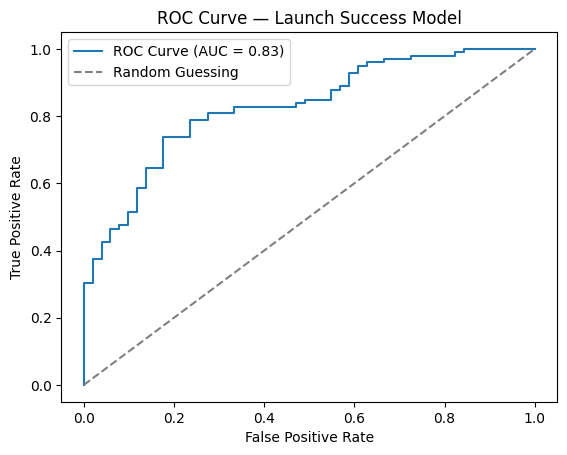

AUC = 0.83
- AUC close to 1.0 means the model separates successes from failures well.
- If AUC ≈ 0.5, the model is no better than random.
- The curve helps decide thresholds: e.g., prioritize fewer false alarms or more true positives.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# -----------------------------
# Step 1: Simulate binary data (success vs failure)
# -----------------------------
np.random.seed(42)
n = 500
marketing_spend = np.random.normal(100, 20, n)
complexity = np.random.randint(1, 5, n)
team_size = np.random.randint(3, 20, n)

# True probability of success
true_prob = 1 / (1 + np.exp(-(0.05*marketing_spend - 0.8*complexity + 0.1*team_size - 3)))
y = np.random.binomial(1, true_prob)

X = pd.DataFrame({
    'marketing_spend': marketing_spend,
    'complexity': complexity,
    'team_size': team_size
})

# -----------------------------
# Step 2: Train/Test split + model
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities on test set
probs = model.predict_proba(X_test)[:,1]

# -----------------------------
# Step 3: Compute ROC curve
# -----------------------------
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)

# -----------------------------
# Step 4: Plot ROC curve
# -----------------------------
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0,1],[0,1], linestyle='--', color='grey', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Launch Success Model")
plt.legend()
plt.show()

# -----------------------------
# Step 5: Interpretation
# -----------------------------
print(f"AUC = {auc:.2f}")
print("- AUC close to 1.0 means the model separates successes from failures well.")
print("- If AUC ≈ 0.5, the model is no better than random.")
print("- The curve helps decide thresholds: e.g., prioritize fewer false alarms or more true positives.")


## Lift: Cumulative Response Curve & Lift Curve

### Cumulative Response Curve
> **Definition**: Plots the cumulative % of actual positives captured vs the % of population targeted, when customers are ranked by model score.

Instead of looking at true positives vs false positives (ROC), **cumulative response curve** looks at business value: **how many actual successes you capture if you act on the top scorers**.

“If I target the top X% of customers ranked by model score, what % of actual positives will I capture?”

or

“If I only have budget to market to 30% of customers, what fraction of buyers will I capture?”

**How it works**
* Rank customers by predicted probability (from high to low).
* Divide into deciles (or percentiles).
* Plot the cumulative % of actual positives captured vs cumulative % of population targeted.
  * A perfect model: captures 100% of positives early (steep curve).
  * A random model: diagonal line (e.g., targeting 20% of customers → 20% of positives).
  

**Example**
* You send a promotion to customers.
* Model predicts probability each customer will buy.
* You can only target 40% of the population (budget constraint).
* Question: “How many of the actual buyers can I capture if I focus on the top 40%?”

### Lift Curve
> **Definition**: Compares the model’s performance to random targeting by plotting the lift (improvement factor).

It highlights how much better the model is than random, at different targeting levels.

Formula (for a given cutoff):
$\text{Lift at k\%} = \frac{\text{Response Rate in Top k\%}}{\text{Overall Response Rate}}$

> ⚠️ Both lift curves and cumulative response curves must be used with care if the exact proportion of positives in the population is unknown or is not represented accurately in the test data. Unlike ROC curves, **these curves assume that the test set has exactly the same target class priors as the population to which the model is applied**.

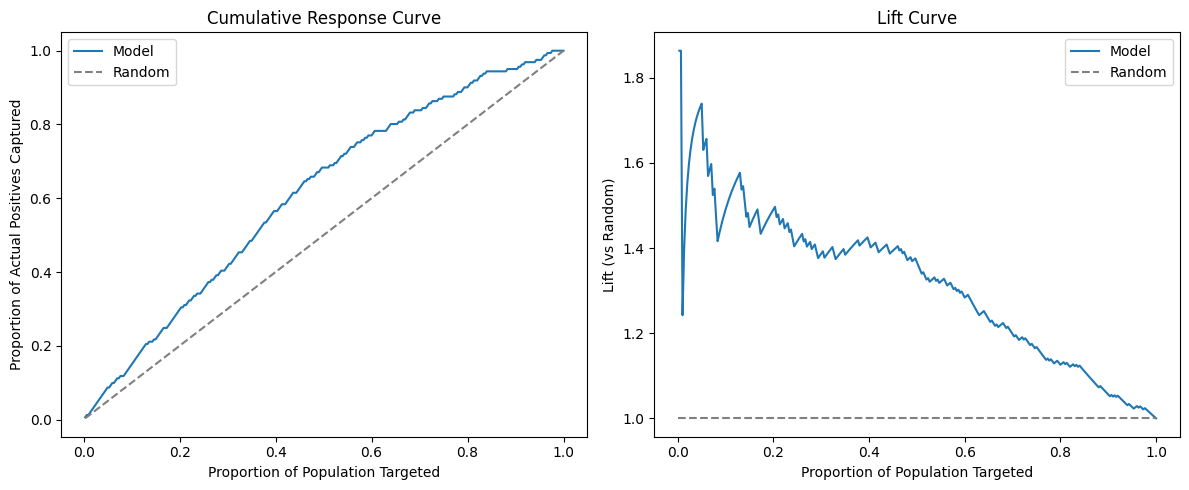

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# -----------------------------
# Step 1: Simulate binary data (success vs failure)
# -----------------------------
np.random.seed(42)
n = 1000
X = np.random.normal(0, 1, (n, 3))
true_probs = 1 / (1 + np.exp(-(0.8*X[:,0] - 0.5*X[:,1] + 0.3*X[:,2])))
y = np.random.binomial(1, true_probs)

# -----------------------------
# Step 2: Train/Test split + model
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:,1]

# -----------------------------
# Step 3: Sort by predicted score
# -----------------------------
sorted_idx = np.argsort(-probs)
y_sorted = y_test[sorted_idx]

# Cumulative positives captured
cum_positives = np.cumsum(y_sorted)
total_positives = sum(y_test)
cum_response = cum_positives / total_positives

# Population percentages
pop_pct = np.arange(1, len(y_test)+1) / len(y_test)

# -----------------------------
# Step 4: Compute Lift
# -----------------------------
overall_rate = total_positives / len(y_test)
response_rate_topk = cum_positives / np.arange(1, len(y_test)+1)
lift = response_rate_topk / overall_rate

# -----------------------------
# Step 5: Plot Response Curve and Lift Curve side by side
# -----------------------------
fig, axs = plt.subplots(1, 2, figsize=(12,5))

# (a) Cumulative Response Curve
axs[0].plot(pop_pct, cum_response, label="Model")
axs[0].plot(pop_pct, pop_pct, linestyle="--", color="gray", label="Random")
axs[0].set_title("Cumulative Response Curve")
axs[0].set_xlabel("Proportion of Population Targeted")
axs[0].set_ylabel("Proportion of Actual Positives Captured")
axs[0].legend()

# (b) Lift Curve
axs[1].plot(pop_pct, lift, label="Model")
axs[1].hlines(1, 0, 1, colors="gray", linestyles="--", label="Random")
axs[1].set_title("Lift Curve")
axs[1].set_xlabel("Proportion of Population Targeted")
axs[1].set_ylabel("Lift (vs Random)")
axs[1].legend()

plt.tight_layout()
plt.show()


## Note on imbalanced datasets
⚠️ Cumulative Response Curve is sensitive and Lift Curve very sensitive to class imbalance.

**ROC**
* **Less sensitive to class imbalance.**
* Why? ROC uses TPR (True Positive Rate) and FPR (False Positive Rate), both normalized within their class.
* Even if you have 1% positives, ROC still gives a balanced view of separability.
* **→ That’s why ROC is often recommended when classes are imbalanced.**

**Cumulative Response Curve**
* **Sensitive to class imbalance.**
* If positives are rare, the curve will rise more slowly, because even the “best” top decile captures only a small fraction of absolute positives.
* For highly imbalanced data, it may look disappointing even if the model is useful.

**Lift Curve**
* **Very sensitive to class imbalance.**
* Lift is defined relative to the overall response rate.
* If overall positives = 1%, then even capturing 5% of positives in the top 1% of the population gives a huge lift (5x).
* Looks impressive, but lift can exaggerate model usefulness when prevalence is low.

## How to check for skewness<a id="skewness"></a>

> A **base rate** is the overall frequency of the positive class in your dataset, before using any model.

* **Simple: check the base rate of positives.**

    ```
    positive_rate = y.mean()
    print(f"Positive rate: {positive_rate:.2%}")
    ```

* **Quantify imbalance**
  
  ```
  y.value_counts(normalize=True)
  ```
  Example output:
  - 0 (no churn): 0.95
  - 1 (churn): 0.05

* **Visualization: a bar plot of class counts.**
  * Rule of thumb:
  * Balanced: 30–70% split.
  * Moderate imbalance: 10–90%.
  * Severe imbalance: <5% positives.

**When is skew critical?**
* Depends on the metric:
  * ROC AUC → robust, skew not critical.
  * Precision/Recall, Response, Lift → heavily affected by skew.
* Critical when:
  * Business decisions depend on absolute number of positives (marketing campaign, fraud detection).
  * Model looks “great” on ROC AUC but delivers almost no practical captures because positives are too rare.
  * **Example**: AUC = 0.9 but only 1% positives → even with a good model, your top 10% may only capture 0.5% of the whole population.
  
### How to deal with skewness?
**a) Complement with precision-recall curve (PR curve)**
* PR curves are better for skewed data.
* Precision = “Of those I predicted positive, how many were actually positive?”
* Recall = TPR.
* Very informative when positives are rare.

**b) Stratified evaluation**
* Always report baseline prevalence alongside metrics.
* Lift only makes sense relative to baseline.

**c) Resampling / reweighting**
* Use SMOTE, undersampling negatives, or class weights in training.
* Ensures the model pays attention to the minority class.

**d) Decision threshold tuning**
* Optimize threshold for business metric (e.g., maximize precision at top 5% targeted).
